## 练习 3-1
对于有频谱泄露的采样信号，尝试使用不同的窗函数，应用在信号上，看看它们对频谱泄露的影响如何。

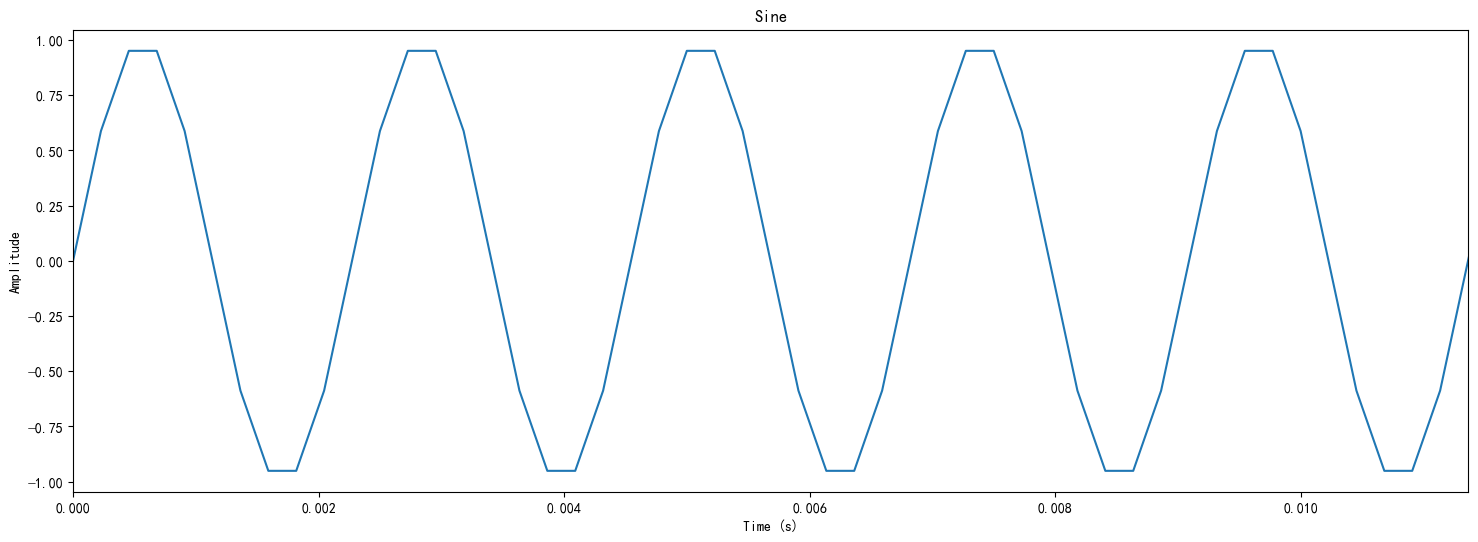

In [35]:
import numpy as np
import librosa
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei", "Times New Roman"]  # 使用系统中存在的字体（可叠加）

# 信号
duration = 1  # 信号持续时间（秒）
sample_rate = 4400  # 采样率（Hz）
base_freq = 440  # 频率
amplitude = 1  # 振幅

# 生成时间序列
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
# 生成信号
sn_signal = amplitude * np.sin(2 * np.pi * base_freq * t)

plt.figure(figsize=(18, 6))
plt.plot(t, sn_signal)
plt.title('Sine')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 5*duration/base_freq)  # 显示5个周期

plt.show()


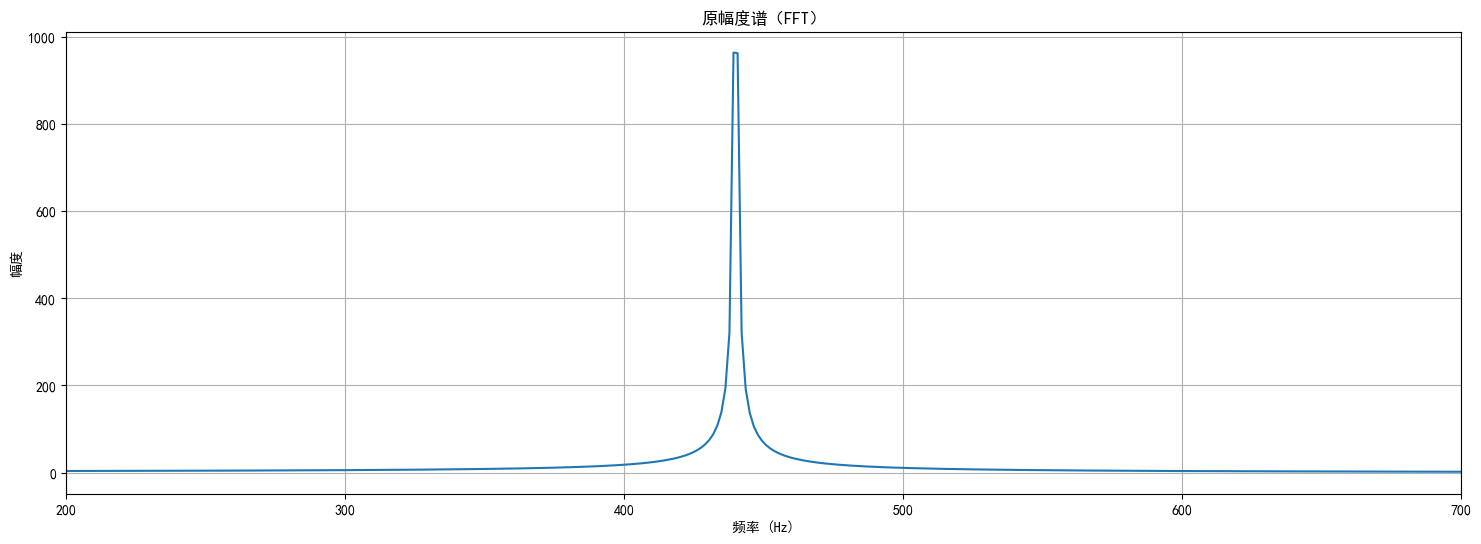

In [36]:
# 频谱
n_fft = 3025  # FFT窗口大小
sn_spec = np.fft.rfft(sn_signal, n=n_fft)  # 加直流偏离，对应频谱上f=0的值
amplitude = np.abs(sn_spec)  # 幅度谱
frequency = np.fft.rfftfreq(n_fft, d=1 / sample_rate)  # 频率轴

# 绘制幅度谱
plt.figure(figsize=(18, 6))
plt.plot(frequency, amplitude)
plt.title('原幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(200, 700)
plt.show()
Audio(sn_signal, rate=2*sample_rate)

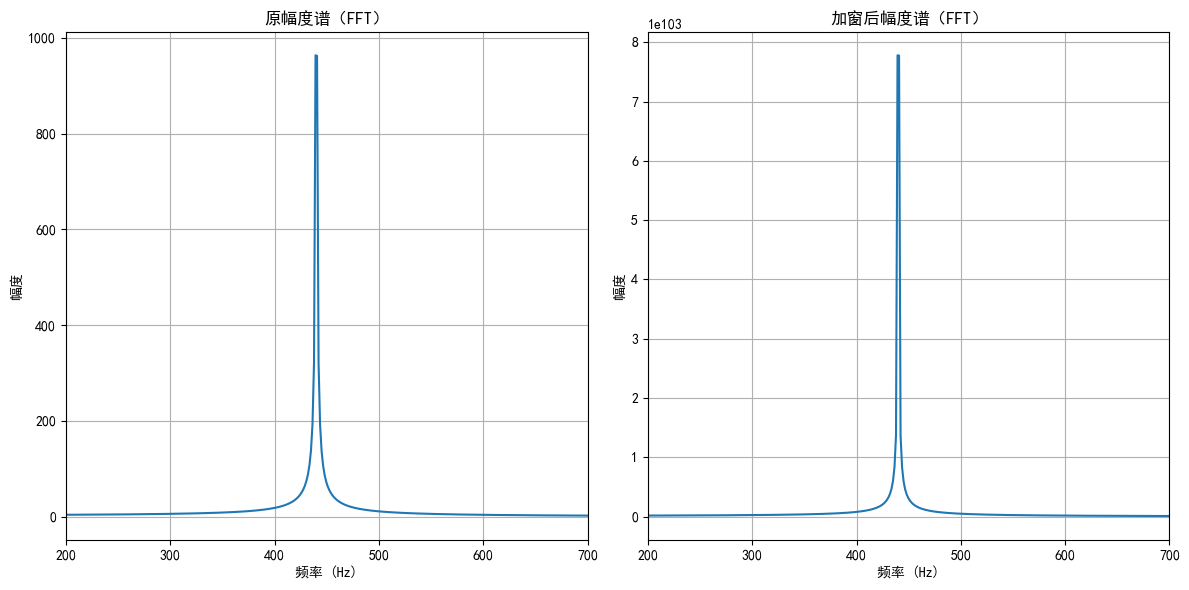

In [37]:
# 应用汉宁窗
window = np.kaiser(len(sn_signal), beta=4)  # 选择窗函数类型，可以改为hanning、hamming、blackman
windowed_signal = sn_signal * window *10e100

windowed_spec = np.fft.rfft(windowed_signal, n=n_fft)
windowed_amplitude = np.abs(windowed_spec)  # 幅度谱

# 可视化对比
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(frequency, amplitude)
plt.title('原幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(200, 700)
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(frequency, windowed_amplitude)
plt.title('加窗后幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(200, 700)
plt.grid(True)


plt.tight_layout()
plt.show()

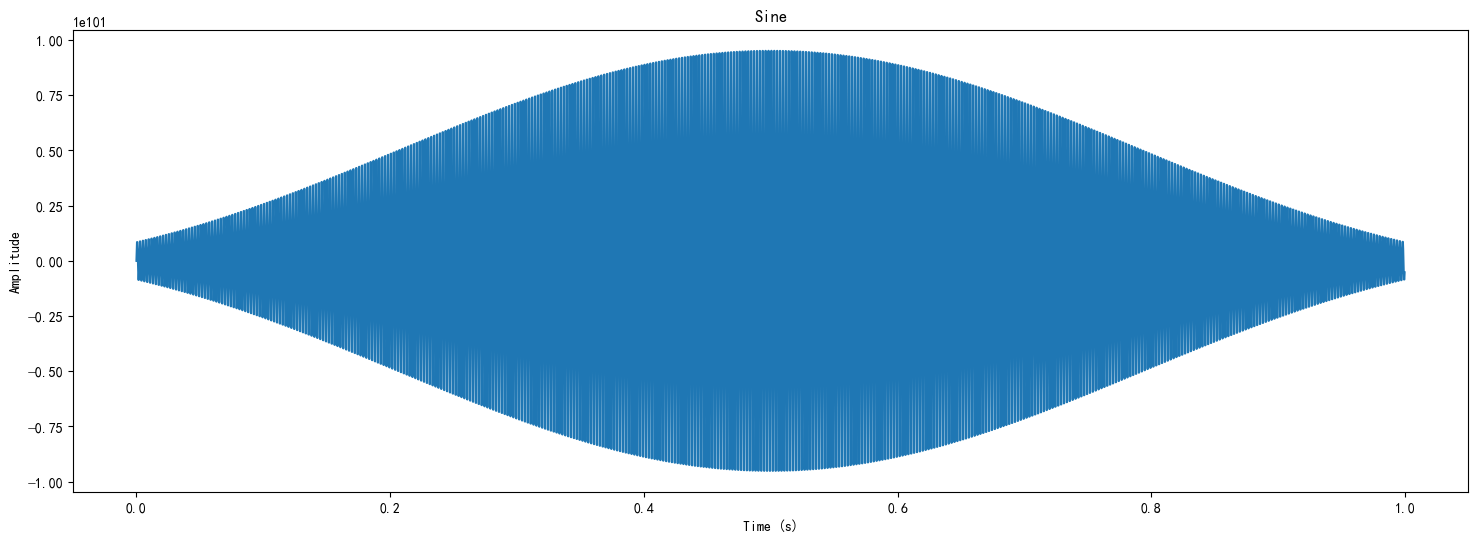

In [38]:
plt.figure(figsize=(18, 6))
plt.plot(t, windowed_signal)
plt.title('Sine')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()
Audio(windowed_signal, rate=2*sample_rate)

l修改过后的信号频谱更接近纯音的单线谱，但由于窗函数对时序信号边缘的削减，导致声音听起来在始末的有明显的响度下降，需要合理选择窗函数的类型与参数。Kaiser窗可以通过设置β较灵活地控制边缘特性。